In [1]:
# importing relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [131]:
# importing the dataset
df = pd.read_csv('loan_prediction.csv')
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
# checking the data types
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#Statistical description of the numerical features
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# lets look at the description of the categorical features
df.describe(include=object).T

,count,unique,top,freq
Loan_ID,614,614,LP001978,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


In [8]:
#Checking for null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#Checking the shape of the data
df.shape

(614, 13)

Y    422
N    192
Name: Loan_Status, dtype: int64


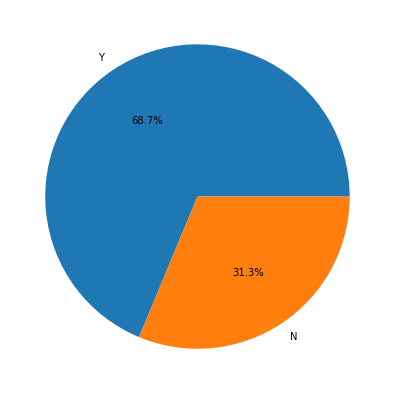

In [10]:
# Let's take a look at the Loan Status column
print((df['Loan_Status'].value_counts()))
fig = plt.figure(figsize =(10, 7))
plt.pie(df['Loan_Status'].value_counts(), labels = ['Y', 'N'], autopct='%1.1f%%')
plt.show()

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

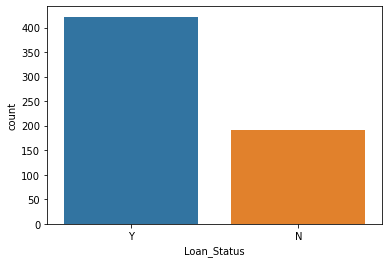

In [11]:
sns.countplot(df['Loan_Status'])

We can see that a greater proportion of the loan applications were granted. with about 68.7% of the loan applications approved

### Now we will explore the various features to see how they influence the loan status

In [14]:
# define a function we will be using to plot our bar charts
def bar_chart(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

Male      489
Female    112
Name: Gender, dtype: int64


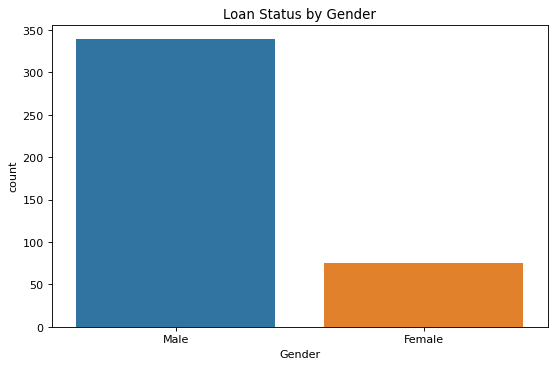

In [20]:
# We'll take a look at Gender. Let's see if males are more trustworhty than females
plt.figure(figsize=(8,5), dpi=80)
sns.countplot(data=df[(df['Loan_Status'] == 'Y')], x='Gender').set_title('Loan Status by Gender')
print(df['Gender'].value_counts())

Well it turns out more males got loans than females, Lets take a closer look at the percentage of loans approved of each Gender to verify if males are really trustworthy 

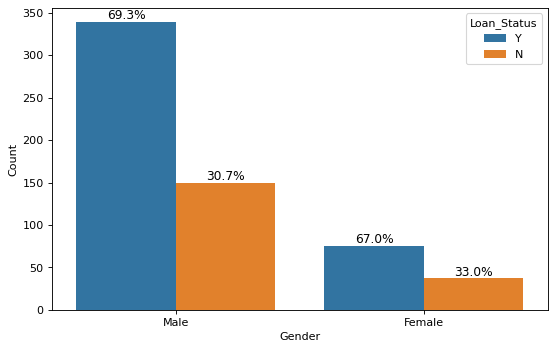

In [15]:
# We'll take a look at Gender. Let's see if males are more trustworhty than females
plt.figure(figsize=(8,5), dpi=80)
gender = sns.countplot(x="Gender", hue="Loan_Status", data=df)
gender.set(xlabel='Gender', ylabel='Count')

bar_chart(gender)
plt.show()

We can now see that 69% of male loan applicants were granted the loans while 67% of female applicants were granted loans. So we can say males are more trustworthy

Yes    398
No     213
Name: Married, dtype: int64


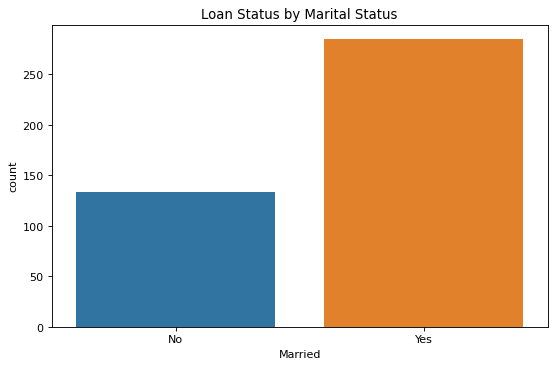

In [21]:
# Now let's see if married people are more trustworthy than singles
plt.figure(figsize=(8,5), dpi=80)
sns.countplot(data=df[(df['Loan_Status'] == 'Y')], x='Married').set_title('Loan Status by Marital Status')
print(df['Married'].value_counts())

Looks like Married People are more responsible and trustworthy as we can see more married applicants were granted loans than single applicants, let's take a closer look to confirm if that is true

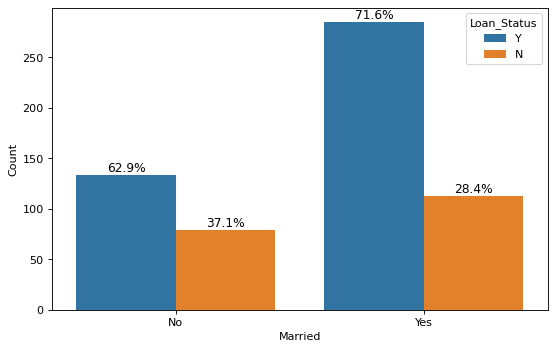

In [39]:
# We'll take a closer look at Married column. Let's see if males are more Couples than Singles
plt.figure(figsize=(8,5), dpi=80)
married = sns.countplot(x="Married", hue="Loan_Status", data=df)
married.set(xlabel='Married', ylabel='Count')

bar_chart(married)
plt.show()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


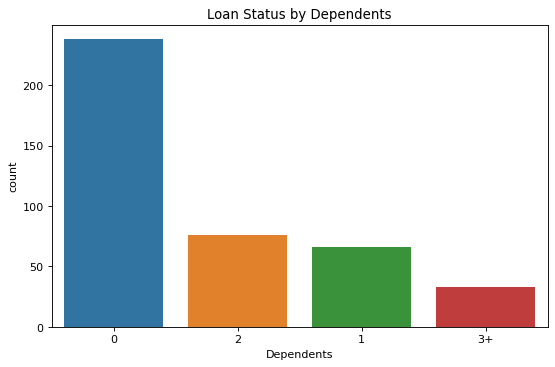

In [25]:
# Let's take a look at the Dependents column
plt.figure(figsize=(8,5), dpi=80)
sns.countplot(data=df[(df['Loan_Status'] == 'Y')], x='Dependents').set_title('Loan Status by Dependents')
print(df['Dependents'].value_counts())

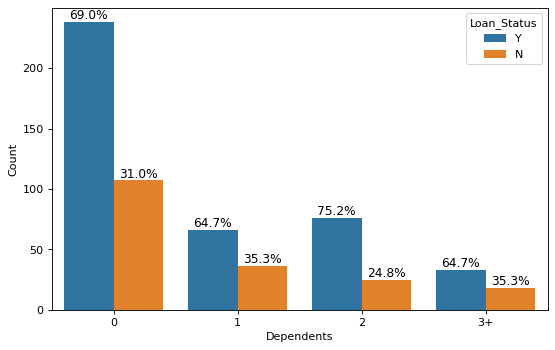

In [38]:
# We'll take a closer look at Dependents column
plt.figure(figsize=(8,5), dpi=80)
dependent = sns.countplot(x="Dependents", hue="Loan_Status", data=df)
dependent.set(xlabel='Dependents', ylabel='Count')

bar_chart(dependent)
plt.show()

We can see that people with more dependents have a lower chance of getting loans, Since they have more financial responsibilities, banks are worried that they may not be able to repay the loan 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


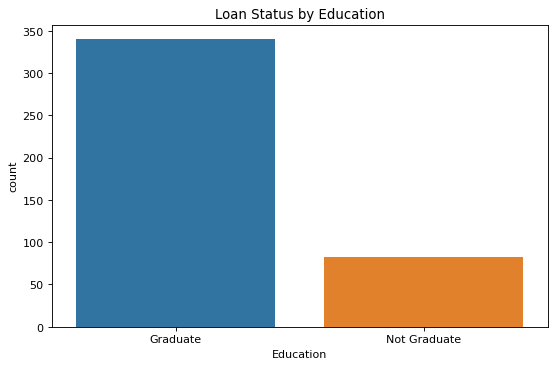

In [29]:
# Let's take a look at the Eduction column
plt.figure(figsize=(8,5), dpi=80)
sns.countplot(data=df[(df['Loan_Status'] == 'Y')], x='Education').set_title('Loan Status by Education')
print(df['Education'].value_counts())

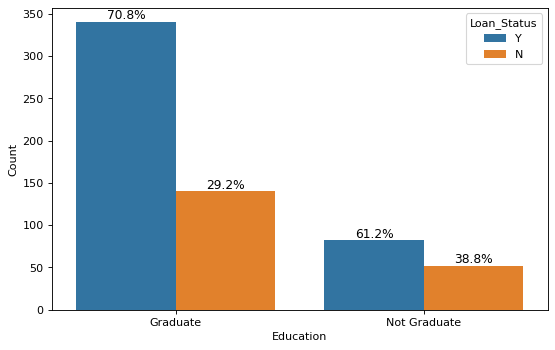

In [33]:
plt.figure(figsize=(8,5), dpi=80)
education = sns.countplot(x="Education", hue="Loan_Status", data=df)
education.set(xlabel='Education', ylabel='Count')

bar_chart(education)
plt.show()

We can see that the number of graduates applying for loans are more than the undergraduates. We also notice that graduates have a better chance of getting loans than undergraduates. 

No     500
Yes     82
Name: Self_Employed, dtype: int64


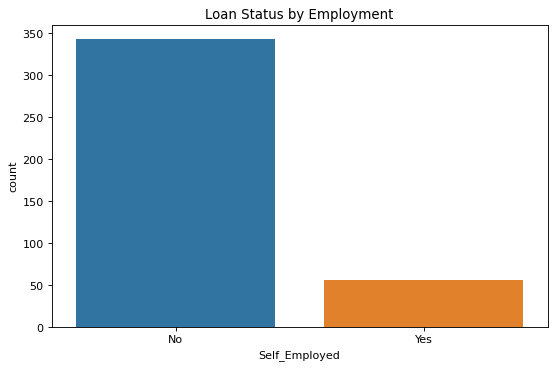

In [35]:
# Let's take a look at the Self_Employed column
plt.figure(figsize=(8,5), dpi=80)
sns.countplot(data=df[(df['Loan_Status'] == 'Y')], x='Self_Employed').set_title('Loan Status by Employment')
print(df['Self_Employed'].value_counts())

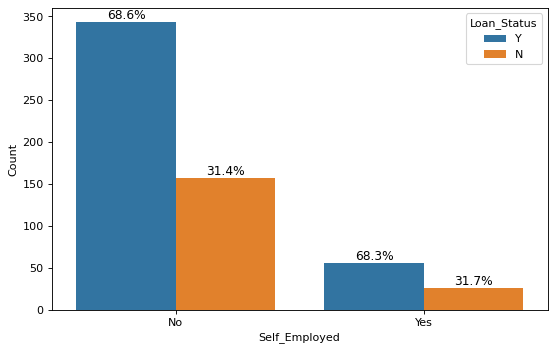

In [37]:
plt.figure(figsize=(8,5), dpi=80)
employment = sns.countplot(x="Self_Employed", hue="Loan_Status", data=df)
employment.set(xlabel='Self_Employed', ylabel='Count')

bar_chart(employment)
plt.show()

We Notice that People who are self-employed don't go in for loans that much, but the acceptance rate is relatively the same with 68% each

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

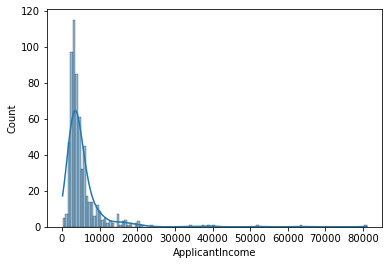

In [46]:
# let's take a look at Applicant Income
sns.histplot(data=df, x="ApplicantIncome", kde=True)

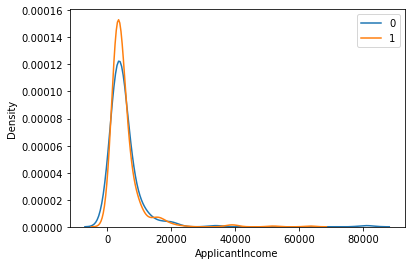

In [44]:
Loan_Status_N = df[(df['Loan_Status'] == 'N')]
Loan_Status_Y = df[(df['Loan_Status'] == 'Y')]
sns.kdeplot(Loan_Status_N.ApplicantIncome)
sns.kdeplot(Loan_Status_Y.ApplicantIncome)
plt.legend(('0', '1'))

Text(0.5, 1.0, 'Loan Status VS Applicant Income')

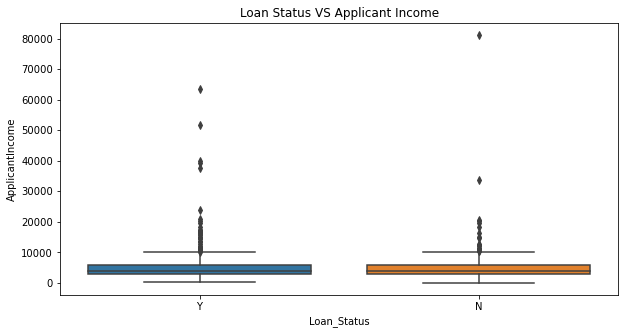

In [45]:
# let's see the effect of monthly income on Attrition
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Loan_Status'],y=df['ApplicantIncome'])
plt.title('Loan Status VS Applicant Income')

We notice that most of the applicants have incomes below 10000 and a few with incomes above 10000

We will separate the income in two groups to see if those with very high income have better chances

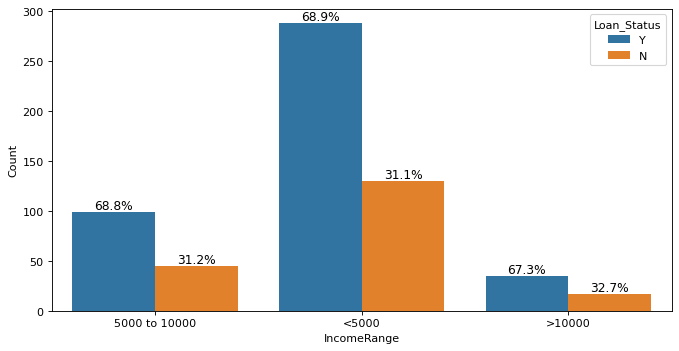

In [68]:
income_range = []
for income in df["ApplicantIncome"]:
    if income < 5000:
        income_range.append("<5000")
    elif income >= 5000 and income <= 10000:
        income_range.append('5000 to 10000')
    else:
        income_range.append('>10000')

df1 = df.copy()       
df1["IncomeRange"] = income_range
plt.figure(figsize=(10,5), dpi=80)
range_ = sns.countplot(x="IncomeRange", hue="Loan_Status", data=df1)
range_.set(xlabel='IncomeRange', ylabel='Count')

bar_chart(range_)
plt.show()

We can now conclude that people with incomes above 10000 hardly apply for loans but the acceptance rate is relatively equal accross all income levels

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

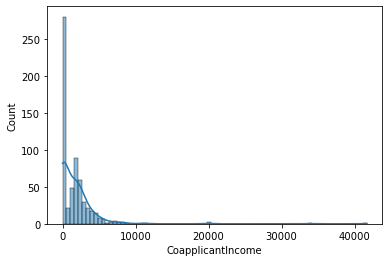

In [71]:
# let's take a look at Co-Applicant Income
sns.histplot(data=df, x="CoapplicantIncome", kde=True)

Text(0.5, 1.0, 'Loan Status VS Co-Applicant Income')

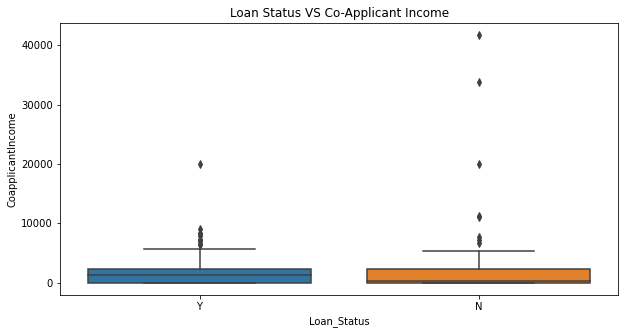

In [72]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Loan_Status'],y=df['CoapplicantIncome'])
plt.title('Loan Status VS Co-Applicant Income')

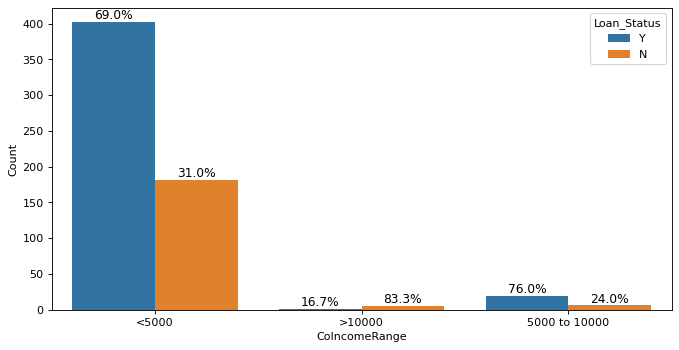

In [75]:
coincome_range = []
for income in df["CoapplicantIncome"]:
    if income < 5000:
        coincome_range.append("<5000")
    elif income >= 5000 and income <= 10000:
        coincome_range.append('5000 to 10000')
    else:
        coincome_range.append('>10000')

df1 = df.copy()       
df1["CoIncomeRange"] = coincome_range
plt.figure(figsize=(10,5), dpi=80)
range_co = sns.countplot(x="CoIncomeRange", hue="Loan_Status", data=df1)
range_co.set(xlabel='CoIncomeRange', ylabel='Count')

bar_chart(range_co)
plt.show()

We can see that a huge number of co_applicants had no income, and the majority of co-applicants had incomes below 5000
There is also a strange finding, most applications with co-applicants having incomes above 10000 were rejected

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

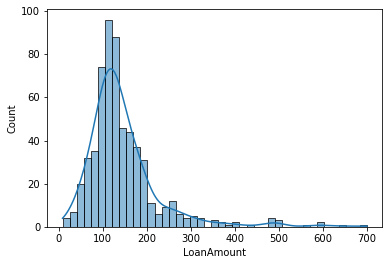

In [78]:
# Now lets take a look at the Loan Amount
sns.histplot(data=df, x="LoanAmount", kde=True)

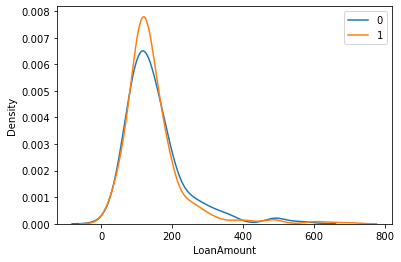

In [77]:
sns.kdeplot(Loan_Status_N.LoanAmount)
sns.kdeplot(Loan_Status_Y.LoanAmount)
plt.legend(('0', '1'))

We notice that a majority of the loans were between 0 to 200, we will further analse to see which of the got accepted

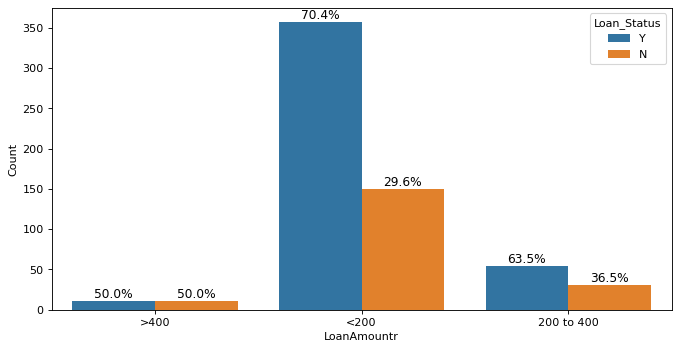

In [80]:
# lets split the loan amounts into three groups to see which ones got accepted more
loan_amount = []
for loan in df["LoanAmount"]:
    if loan < 200:
        loan_amount.append("<200")
    elif loan >= 200 and income <= 400:
        loan_amount.append('200 to 400')
    else:
        loan_amount.append('>400')

df1 = df.copy()       
df1["LoanAmountr"] = loan_amount
plt.figure(figsize=(10,5), dpi=80)
loans = sns.countplot(x="LoanAmountr", hue="Loan_Status", data=df1)
loans.set(xlabel='LoanAmountr', ylabel='Count')

bar_chart(loans)
plt.show()

As expected, Smaller loans are easily granted than bigger loans as we can see from the chart above. 70% of loans below 200 were granted, 63% of loans between 200 to 400 were granted and only 50% of loans above 400 were granted

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

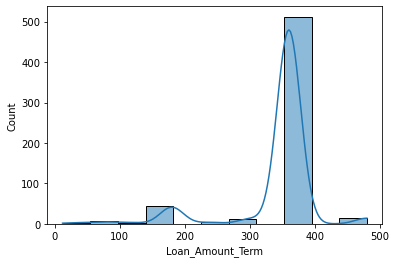

In [82]:
# Now we'll take a look at Loan Amount Term
sns.histplot(data=df, x="Loan_Amount_Term", kde=True)

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


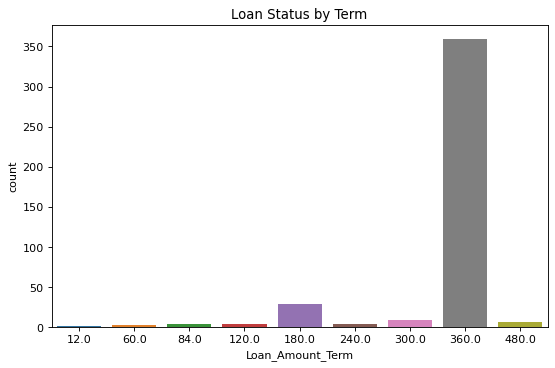

In [84]:
plt.figure(figsize=(8,5), dpi=80)
sns.countplot(data=df[(df['Loan_Status'] == 'Y')], x='Loan_Amount_Term').set_title('Loan Status by Term')
print(df['Loan_Amount_Term'].value_counts())

We notice that most of the loans were a 360 term loan or a year's term loan, lets further see which of them were granted more

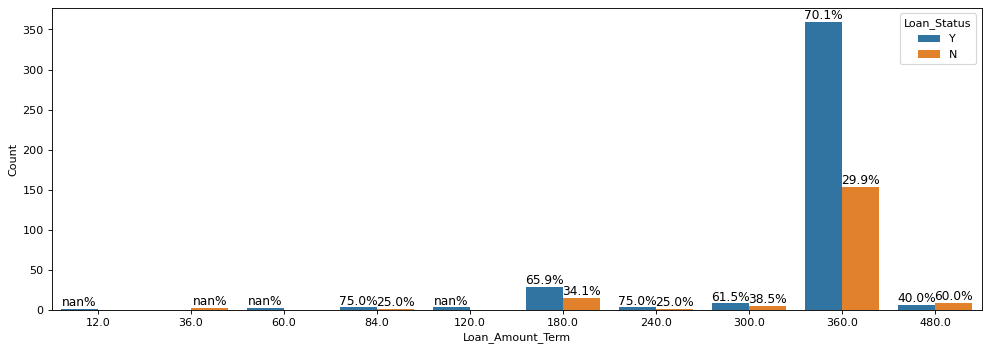

In [96]:
plt.figure(figsize=(15,5), dpi=80)
term = sns.countplot(x="Loan_Amount_Term", hue="Loan_Status", data=df)
term.set(xlabel='Loan_Amount_Term', ylabel='Count')

bar_chart(term)
plt.show()

We can see most of the loans within a 360 term period were granted meanwhile only 40% of loans above 360 term period were granted, which means it's easier to get short term loans than long term loans.

1.0    475
0.0     89
Name: Credit_History, dtype: int64


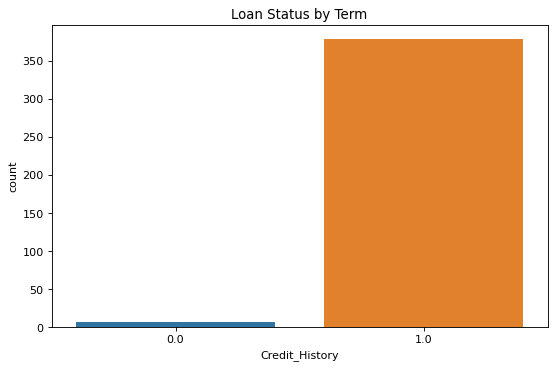

In [93]:
# Now Let's take a look at Credit History
plt.figure(figsize=(8,5), dpi=80)
sns.countplot(data=df[(df['Loan_Status'] == 'Y')], x='Credit_History').set_title('Loan Status by Term')
print(df['Credit_History'].value_counts())

We can see that those with credit history had loans approved more than those without credit history
Lets explore further to confirm this.

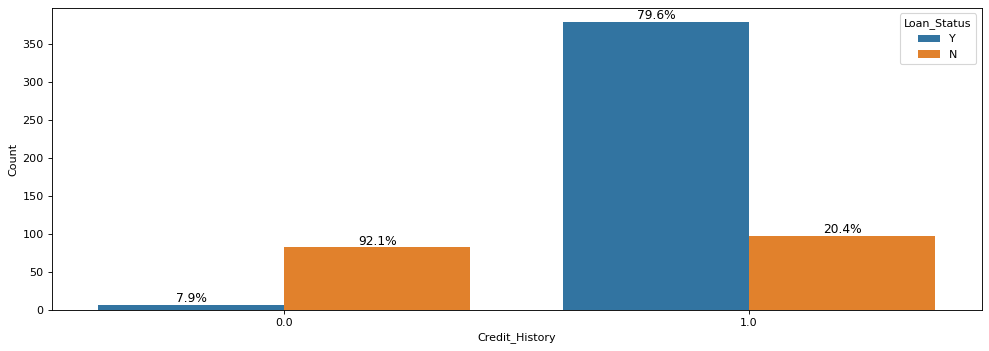

In [95]:
plt.figure(figsize=(15,5), dpi=80)
history = sns.countplot(x="Credit_History", hue="Loan_Status", data=df)
history.set(xlabel='Credit_History', ylabel='Count')

bar_chart(history)
plt.show()

Only about 8% of applicants without credit history were granted loans meanwhile about 80% of applicants with fcredit history were granted loans, This means creadit history has a huge impact on Loan Status

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


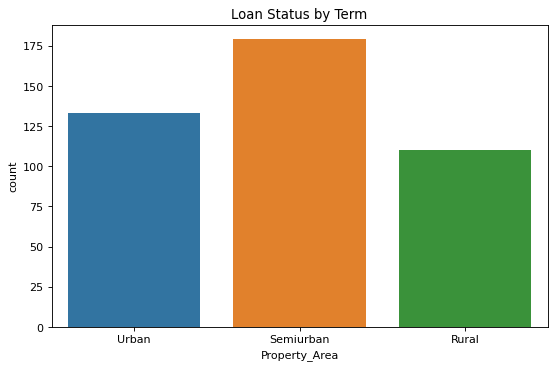

In [99]:
# Now leet's take a look at Property Area
plt.figure(figsize=(8,5), dpi=80)
sns.countplot(data=df[(df['Loan_Status'] == 'Y')], x='Property_Area').set_title('Loan Status by Term')
print(df['Property_Area'].value_counts())

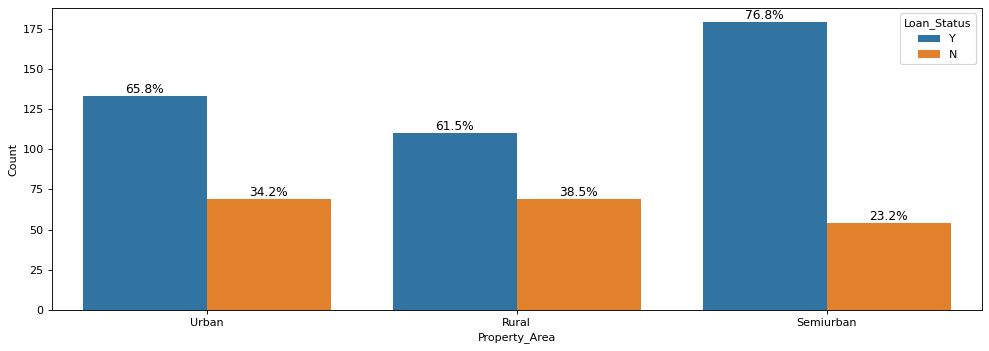

In [100]:
plt.figure(figsize=(15,5), dpi=80)
history = sns.countplot(x="Property_Area", hue="Loan_Status", data=df)
history.set(xlabel='Property_Area', ylabel='Count')

bar_chart(history)
plt.show()

We can see that Loan applications with properties in rural areas had lower chances of acceptance meanwhile those with properties in semi-urban areas had the highes acceptance rate

### Pre Processing and Data Cleaning

In [132]:
# let's check for unique values in the dataset
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print('________________________________________________')

Loan_ID: Number of unique values 614
________________________________________________
Gender: Number of unique values 2
________________________________________________
Married: Number of unique values 2
________________________________________________
Dependents: Number of unique values 4
________________________________________________
Education: Number of unique values 2
________________________________________________
Self_Employed: Number of unique values 2
________________________________________________
ApplicantIncome: Number of unique values 505
________________________________________________
CoapplicantIncome: Number of unique values 287
________________________________________________
LoanAmount: Number of unique values 203
________________________________________________
Loan_Amount_Term: Number of unique values 10
________________________________________________
Credit_History: Number of unique values 2
________________________________________________
Property_Area: Numbe

We notice the Loan_ID column has all unique values, this will not be useful for us, so we will drop that column

In [133]:
df = df.drop('Loan_ID', axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [134]:
# Let's take a look at the correlation between the data
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

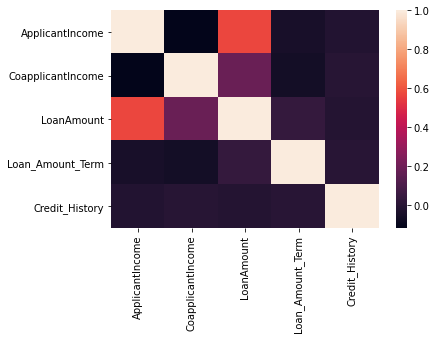

In [135]:
sns.heatmap(df.corr())

In [136]:
# We also noticed earlier that our dataset had alot of null values, let's tackle them now
# We will do imputation, mean imputation for numerical columns and mode imputation for categorical columns
for column in df.columns:
    if df[column].dtype == object:
        df[column].fillna(value=(df[column]).mode, inplace=True)
    else:
        df[column].fillna(value=np.mean(df[column]), inplace=True)
df.head(10)        

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [137]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [138]:
# change the Loan Status column to numeric
df['Loan_Status'] = df['Loan_Status'].factorize(['N','Y'])[0]
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [139]:
# Some of the Variables are categorical, we will do some encoding to make them numerical for better processing
# separating the categorical columns
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
categorical_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [140]:
# encoding the categorical columns
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = df[column].astype('string')
    df[column] = label.fit_transform(df[column])

In [141]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2,1,0,0,1,5849,0.0,146.412162,360.0,1.0,2,1
1,2,2,1,0,1,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,2,0,0,2,3000,0.0,66.000000,360.0,1.0,2,1
3,2,2,0,1,1,2583,2358.0,120.000000,360.0,1.0,2,1
4,2,1,0,0,1,6000,0.0,141.000000,360.0,1.0,2,1
5,2,2,2,0,2,5417,4196.0,267.000000,360.0,1.0,2,1
6,2,2,0,1,1,2333,1516.0,95.000000,360.0,1.0,2,1
7,2,2,3,0,1,3036,2504.0,158.000000,360.0,0.0,1,0
8,2,2,2,0,1,4006,1526.0,168.000000,360.0,1.0,2,1
9,2,2,1,0,1,12841,10968.0,349.000000,360.0,1.0,1,0


In [142]:
# Now lets check correlation again
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.277459,0.106895,0.068774,-0.031116,-0.024689,0.073642,0.022241,-0.060394,0.032801,-0.008142,0.029040
Married,0.277459,1.000000,0.251020,0.022530,0.030171,0.047691,0.083270,0.141196,-0.103747,-0.003329,-0.003370,0.075547
Dependents,0.106895,0.251020,1.000000,0.060466,0.058097,0.103416,0.011146,0.130722,-0.073683,-0.077539,0.032600,-0.007318
Education,0.068774,0.022530,0.060466,1.000000,0.000820,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.031116,0.030171,0.058097,0.000820,1.000000,0.092967,-0.052384,0.082292,-0.017594,-0.035999,-0.028730,-0.011332
ApplicantIncome,-0.024689,0.047691,0.103416,-0.140760,0.092967,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.073642,0.083270,0.011146,-0.062290,-0.052384,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.022241,0.141196,0.130722,-0.166998,0.082292,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.060394,-0.103747,-0.073683,-0.077242,-0.017594,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.032801,-0.003329,-0.077539,-0.077936,-0.035999,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


<AxesSubplot:>

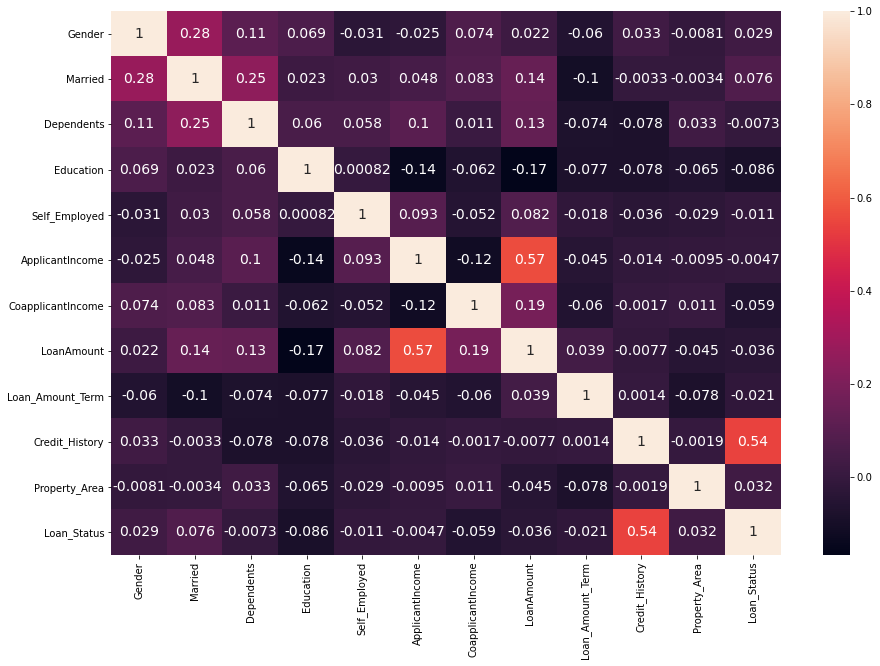

In [145]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True,  annot_kws={"size":14})

In [146]:
# Now we will split the data into testing and training sets
x = df.drop('Loan_Status', axis=1)
y = df.Loan_Status
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [147]:
# Now let's check for skewness
df.skew().sort_values()

Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Gender              -1.933379
Loan_Status         -0.809998
Married             -0.725064
Property_Area       -0.066196
Self_Employed        0.491660
Dependents           1.089068
Education            1.367622
LoanAmount           2.726601
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
dtype: float64

In [148]:
# We will do some transformation to try make the data distributions normal
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='box-cox', standardize=True)
power2 = PowerTransformer(standardize=True)
for column in df.columns:
    if df[column].skew() >= 1:
        try:
            power.fit_transform(df[column].to_numpy().reshape(-1, 1))
        except ValueError:
            power2.fit_transform(df[column].to_numpy().reshape(-1, 1))

In [150]:
# Now we will scale the data to remove variances
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_test= pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.5,0.5,0.0,1.0,0.5,0.021005,0.056760,0.160637,0.705128,1.0,1.0
1,1.0,1.0,0.0,0.0,0.5,0.040686,0.047136,0.154848,0.743590,1.0,0.0
2,1.0,1.0,0.0,0.0,0.5,0.044127,0.000000,0.146165,0.743590,1.0,0.5
3,1.0,1.0,0.0,0.0,0.5,0.057557,0.019920,0.167873,0.743590,1.0,0.5
4,0.0,0.5,0.0,0.0,0.5,0.041750,0.000000,0.125904,0.743590,1.0,1.0


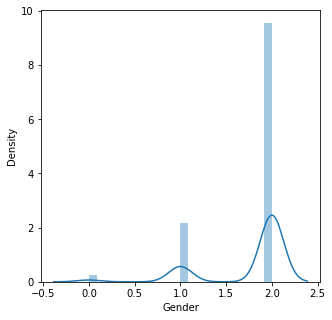

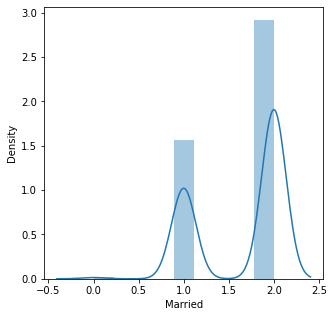

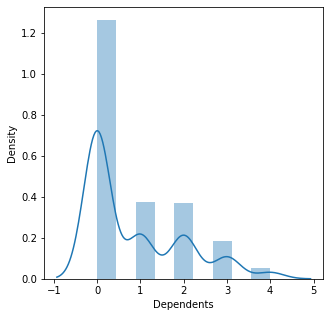

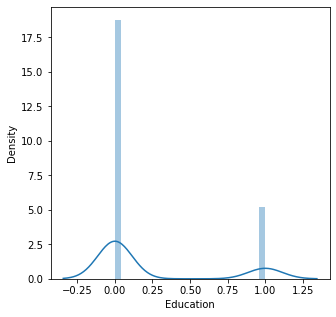

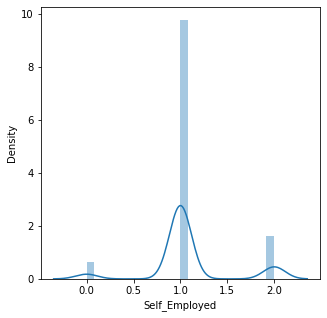

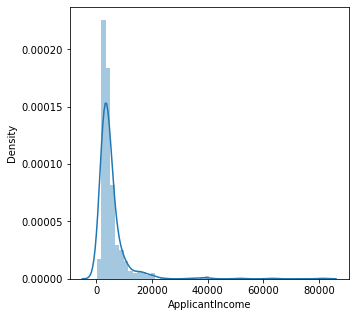

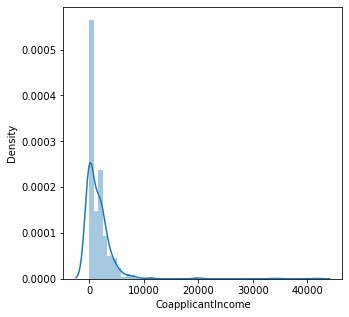

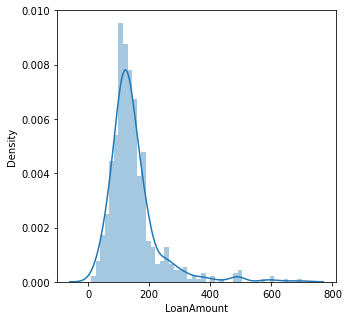

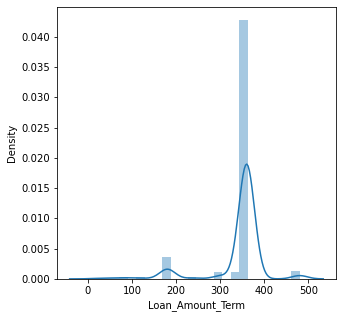

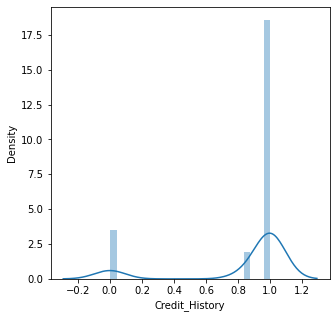

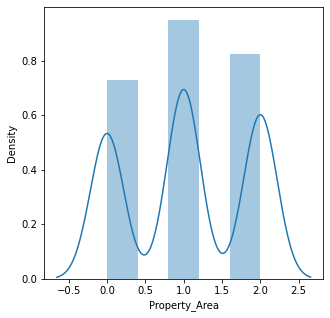

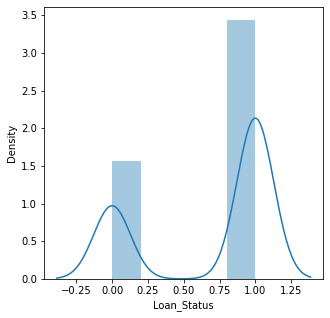

In [151]:
# let's check the distribution of the features
for column in df.columns:
    plt.figure(figsize = (5,5))
    sns.distplot(df[column])

In [152]:
# lets use vif to check for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i)
                          for i in range(len(x_train.columns))]
  
print(vif_data)

              feature        VIF
0              Gender  16.169895
1             Married  14.051822
2          Dependents   1.807033
3           Education   1.354072
4       Self_Employed   6.895364
5     ApplicantIncome   2.954107
6   CoapplicantIncome   1.588477
7          LoanAmount   6.651897
8    Loan_Amount_Term  15.812182
9      Credit_History   7.246935
10      Property_Area   2.568103


In [153]:
#Creating a function within many Machine Learning Models
def models(x_train,y_train):
  
    #Using Logistic Regression Algorithm to the Training Set
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(x_train, y_train)

    #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)

    #Using SVC method of svm class to use Support Vector Machine Algorithm
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(x_train, y_train)

    #Using SVC method of svm class to use Kernel SVM Algorithm
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(x_train, y_train)

    #Using XGBoost Algorithm
    from sklearn.ensemble import AdaBoostClassifier
    ada = AdaBoostClassifier()
    ada.fit(x_train, y_train)

    #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier()
    tree.fit(x_train, y_train)

    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier()
    forest.fit(x_train, y_train)

    #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(x_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(x_train, y_train))
    print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(x_train, y_train))
    print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(x_train, y_train))
    print('[4]Ada Boost Training Accuracy:', ada.score(x_train, y_train))
    print('[5]Decision Tree Classifier Training Accuracy:', tree.score(x_train, y_train))
    print('[6]Random Forest Classifier Training Accuracy:', forest.score(x_train, y_train))

    return log, knn, svc_lin, svc_rbf, ada, tree, forest

In [154]:
model = models(x_train,y_train)

[0]Logistic Regression Training Accuracy: 0.7925407925407926
[1]K Nearest Neighbor Training Accuracy: 0.8018648018648019
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.7925407925407926
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.7948717948717948
[4]Ada Boost Training Accuracy: 0.8228438228438228
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 1.0


In [155]:
for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(x_test)) 
    #extracting TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print()

[[ 32  26]
 [  2 125]]
Model[0] Testing Accuracy = "0.8486486486486486 !"

[[ 33  25]
 [  9 118]]
Model[1] Testing Accuracy = "0.8162162162162162 !"

[[ 32  26]
 [  2 125]]
Model[2] Testing Accuracy = "0.8486486486486486 !"

[[ 32  26]
 [  2 125]]
Model[3] Testing Accuracy = "0.8486486486486486 !"

[[ 38  20]
 [ 12 115]]
Model[4] Testing Accuracy = "0.827027027027027 !"

[[35 23]
 [31 96]]
Model[5] Testing Accuracy = "0.7081081081081081 !"

[[ 36  22]
 [ 12 115]]
Model[6] Testing Accuracy = "0.8162162162162162 !"



In [156]:
# Regularization Random Forest Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
parameters = {'criterion':['gini', 'entropy', 'log_loss'],
             'n_estimators':list(range(10)),
             'max_features':['sqrt', 'log2']}
rf = RandomForestClassifier()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 9}


In [157]:
rf = RandomForestClassifier(criterion='gini',max_features='log2', n_estimators=9)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_dec = rf.predict(x_test)

rfs = accuracy_score(y_test, pred_dec)
print(rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print(rfc*100)

77.83783783783784
77.20111955217914


In [158]:
# Regularization Logistic Regression
from sklearn.linear_model import LogisticRegression
parameters = {'fit_intercept':[True,False],
             'intercept_scaling':list(range(1,10)),
             'penalty':['l1', 'l2', 'elasticnet', 'none']}
lr = LogisticRegression()
clf = GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'fit_intercept': True, 'intercept_scaling': 1, 'penalty': 'l2'}


In [159]:
lr = LogisticRegression(fit_intercept:='l2', intercept_scaling=1)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_dec = lr.predict(x_test)

lrs = accuracy_score(y_test, pred_dec)
print(lrs*100)

lrscore = cross_val_score(lr,x,y,cv=5)
lrc = lrscore.mean()
print(lrc*100)

84.86486486486487
79.15233906437426


In [160]:
# Regularization Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
parameters = {'learning_rate':[0.001,0.01,0.1,1.0,10],
             'n_estimators':[0.001,0.01, 0.1,1.0,10],
             'random_state':list(range(1,100))}
ab = AdaBoostClassifier()
clf = GridSearchCV(ab,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'learning_rate': 0.001, 'n_estimators': 10, 'random_state': 1}


In [161]:
ab = AdaBoostClassifier(learning_rate=0.001,random_state=1,n_estimators=10)
ab.fit(x_train,y_train)
ab.score(x_train,y_train)
pred_dec = ab.predict(x_test)

absc = accuracy_score(y_test, pred_dec)
print(absc*100)

abscore = cross_val_score(ab,x,y,cv=5)
abc = abscore.mean()
print(abc*100)

84.86486486486487
80.9462881514061


In [162]:
# Regularization Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
parameters = {'splitter':['best', 'random'],
             'min_samples_split':list(range(1,10)),
             'criterion':['gini', 'entropy', 'log_loss']}
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'min_samples_split': 8, 'splitter': 'random'}


In [163]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=8, splitter='random')
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
pred_dec = dt.predict(x_test)

dtsc = accuracy_score(y_test, pred_dec)
print(dtsc*100)

dtscore = cross_val_score(dt,x,y,cv=5)
dtc = dtscore.mean()
print(dtc*100)

72.97297297297297
70.68639210982275


In [164]:
# Regularization Support Vector Machine
from sklearn.svm import SVC

parameters = {'random_state': list(range(1,100)),
             'kernel':['poly', 'rbf', 'sigmoid'],
             'gamma':['scale', 'auto']}
svc = SVC()
clf = GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'gamma': 'scale', 'kernel': 'rbf', 'random_state': 1}


In [165]:
svc = SVC(gamma='scale', kernel='rbf', random_state=1)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
pred_dec = svc.predict(x_test)

svsc = accuracy_score(y_test, pred_dec)
print(svsc*100)

svscore = cross_val_score(svc,x,y,cv=5)
svs = svscore.mean()
print(svs*100)

84.86486486486487
68.72984139677463


In [166]:
# Regularization K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors':list(range(10)),
             'weights':['uniform', 'distance'],
             'algorithm':['auto', 'ball_tree', 'kd_tree','brute']}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}


In [169]:
knn = KNeighborsClassifier(n_neighbors=9,weights='uniform',algorithm='auto')
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_dec = knn.predict(x_test)

knnc = accuracy_score(y_test, pred_dec)
print(knnc*100)

knnscore = cross_val_score(knn,x,y,cv=5)
knc = knnscore.mean()
print(knc*100)

83.78378378378379
66.28415300546449


From the performance we can see that the RandomForestClassifier performed best, we will save it for production

In [168]:
# saving the best model
import pickle
pickle.dump(rf, open('loan_status.pkl','wb'))